# opencv 설치

#### conda로 설치

In [ ]:
conda install opencv-python==4.2.0.34

In [ ]:
conda install opencv-contrib-python==4.2.0.34

In [ ]:
conda update -n base -c defaults conda

#### pip로 설치

In [5]:
pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.4/38.6 MB 8.9 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/38.6 MB 22.6 MB/s eta 0:00:02
   ---- ----------------------------------- 4.3/38.6 MB 30.4 MB/s eta 0:00:02
   ------ --------------------------------- 5.9/38.6 MB 34.2 MB/s eta 0:00:01
   -------- ------------------------------- 7.8/38.6 MB 35.7 MB/s eta 0:00:01
   ---------- ----------------------------- 10.5/38.6 MB 50.1 MB/s eta 0:00:01
   ------------- -------------------------- 13.2/38.6 MB 50.4 MB/s eta 0:00:01
   --------------- ------------------------ 14.7/38.6 MB 59.5 MB/s eta 0:00:01
   --------------- ------------------------ 14.7/38.6 MB 59.5 MB/s eta 0:00:01
   --------------- ------------------------ 14.7/38.6 MB 59.5 MB/s eta 0:00:01
   --------------- ------------------------ 14.7/38.6 MB 59.5 MB/s eta 0:00:

# opencv는BRG
- imshow() 하기 전에 cvtColor 이용해서 RGB로 변경해야 자연스러움

In [50]:
import matplotlib.pyplot as plt
import cv2

In [52]:
imgBGR = cv2.imread('./img/opencv/cat.bmp')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

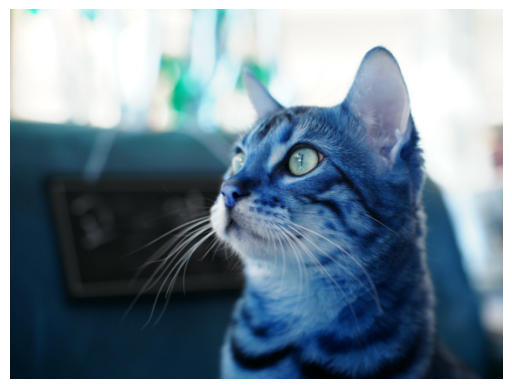

In [53]:
plt.axis('off')
plt.imshow(imgBGR)
plt.show()

## RGB

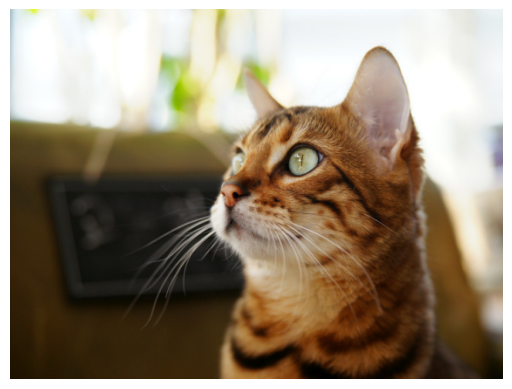

In [54]:
plt.axis('off')
plt.imshow(imgRGB)
plt.show()

### 가로세로 255픽셀 / RGB 3채널

In [55]:
imgRGB.shape

(480, 640, 3)

## Gray

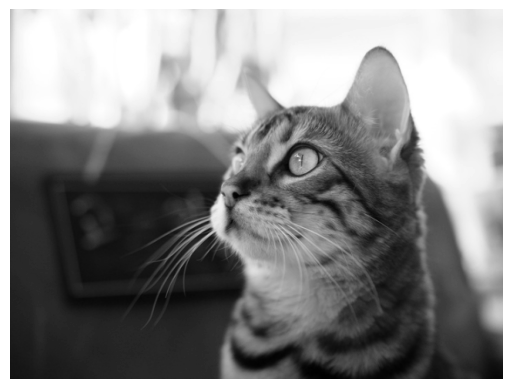

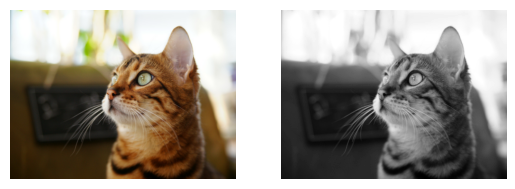

In [56]:
# 그레이스케일 영상 출력
imgGray = cv2.imread('./img/opencv/cat.bmp', cv2.IMREAD_GRAYSCALE)

plt.axis('off')
plt.imshow(imgGray, cmap='gray')
plt.show()

# 두 개의 영상을 함께 출력
plt.subplot(121), plt.axis('off'), plt.imshow(imgRGB)
plt.subplot(122), plt.axis('off'), plt.imshow(imgGray, cmap='gray')
plt.show()

---

# mask
![nn](./img/opencv/mask.png)

In [59]:
import sys
import cv2


# 마스크 영상을 이용한 영상 합성
src = cv2.imread('./img/opencv/airplane.bmp', cv2.IMREAD_COLOR)
mask = cv2.imread('./img/opencv/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.imread('./img/opencv/field.bmp', cv2.IMREAD_COLOR)

if src is None or mask is None or dst is None:
    print('Image load failed!')
    sys.exit()

#### 마스크 연산

In [60]:
# 이 부분이 마스크 연산
cv2.copyTo(src, mask, dst)
dst[mask > 0] = src[mask > 0]

#### 이미지 합치기

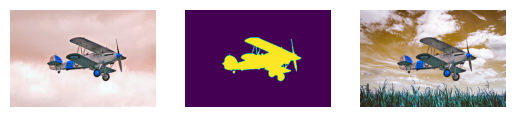

In [61]:
plt.subplot(131), plt.axis('off'), plt.imshow(src)
plt.subplot(132), plt.axis('off'), plt.imshow(mask)
plt.subplot(133), plt.axis('off'), plt.imshow(dst)

plt.show()

---

# 동영상 - cv2.VideoCapture 클래스
- 카메라 동작
- 동영상 재생

### 카메라 play
- cv2.VideoCapture(0)

In [62]:
import sys
import cv2

# 카메라 열기
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print('camera open failed!')
    sys.exit()

# 카메라 프레임 처리
while True:
    ret, frame = cap.read() # ret: True/False

    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # frame: 카메라로 들어온 이미지
    inversed = ~frame
    
    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)
    cv2.imshow('inversed', inversed)

    if cv2.waitKey(1) == 27:  # ESC
        break

cap.release()
cv2.destroyAllWindows()

### 동영상 재생
- cv2.VideoCapture('동영상 경로')

In [63]:
import sys
import cv2


# 비디오 파일 열기
cap = cv2.VideoCapture('./img/opencv/video1.mp4')

if not cap.isOpened():
    print("Video open failed!")
    sys.exit()

# 비디오 프레임 크기, 전체 프레임수, FPS 등 출력
print('Frame width:', int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height:', int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame count:', int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

fps = cap.get(cv2.CAP_PROP_FPS)
print('FPS:', fps)

delay = round(1000 / fps)

# 비디오 매 프레임 처리
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)

    if cv2.waitKey(delay) == 27:
        break

cap.release()
cv2.destroyAllWindows()


Frame width: 1280
Frame height: 720
Frame count: 85
FPS: 24.0


### 카메라 녹화 후 output.avi로 저장
- cv2.VideoCapture(0) 카메라 켠 후
- cv2.VideoWriter(저장경로) 동영상 저장

In [64]:
import sys
import cv2


cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Camera open failed!")
    sys.exit()

w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'DIVX') # *'DIVX' == 'D', 'I', 'V', 'X'
delay = round(1000 / fps)

out = cv2.VideoWriter('./img/opencv/output.avi', fourcc, fps, (w, h))

if not out.isOpened():
    print('File open failed!')
    cap.release()
    sys.exit()

while True:
    ret, frame = cap.read()

    if not ret:
        break

    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    out.write(frame)

    cv2.imshow('frame', frame)
    #cv2.imshow('gray', gray)

    if cv2.waitKey(delay) == 27:
        break

cap.release()
out.release()
cv2.destroyAllWindows()